# INTRODUCTION

### Background: As per the World Health Organization (WHO), every year there are about one million suicides worldwide, with a mortality rate of 11.6 per 100,000 persons each year. Its an alarming fact that so many people are committing suicides every year. You can imagine one person committing suicide every 40 seconds and it is estimated to increase up to one person dying of suicide per 20 seconds by the year 2020.

###### We can use Data Analysis to study worldwide suicide data and quantify our results using statistical techniques. This will help us gain various insights about the suicides happening all over the world.

###### Objective of this Study:

* To show the use of statistical methods in real world problems, for finding out if there is some statistical significance of an assumption we make after primary analysis of a data set.

###### Here we will explain and apply two well known statistical techniques:
1. Hypothesis Testing
2. Spearman’s rank correlation coefficient

* The results of these statistical experiments will give us concrete proof of the assumptions we make after analyzing a set of data.

# What is Hypothesis Testing?

#### Hypothesis testing, also known as confirmatory data analysis is the technique of finding out whether our assumed hypothesis is True or False with statistical proof of it. For example, we may take a data set of the price of same/similar products which are manufactured by two different companies and want to know whether the products of one company is more expensive than the other. Our objective can be achieved by hypothesis testing.

#### "Oxford dictionary states the meaning of hypothesis as “ A supposition or proposed explanation made on the basis of limited evidence as a starting point for further investigation"

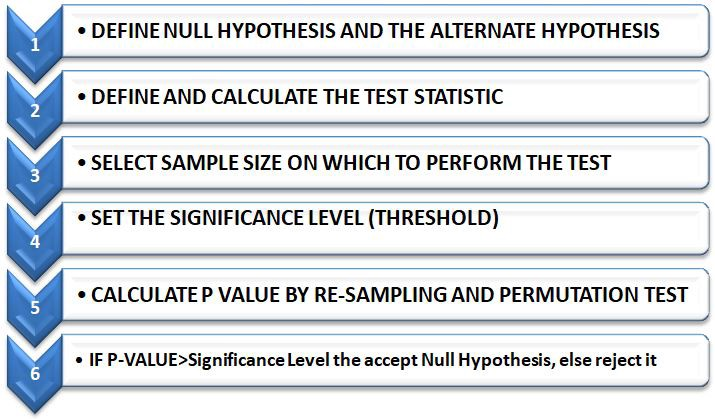

#### Null Hypothesis is the default assumption we make at the start of this test. Like, there is no significant difference between two sets of data. Alternate Hypothesis is the opposite of this assumption.

#### Test Statistic is the difference of mean, median, standard deviation etc between two sets of data, that we “actually observe” after taking samples from both data sets and calculating the test statistic.

#### Deciding the Sample Size is a very important factor, as the test statistic value will differ according to the sample size. The larger the sample size the more accurate will the result be.

#### Significance Level or alpha is the threshold of probability depending upon which we decide whether we accept or reject our null hypothesis. By default it is taken as 5% or 0.05. You can decrease it in the cases when a very high level of accuracy is required.

#### P-Value is calculated by Re-sampling and Permutation test

#### The illustrations below will make things clearer

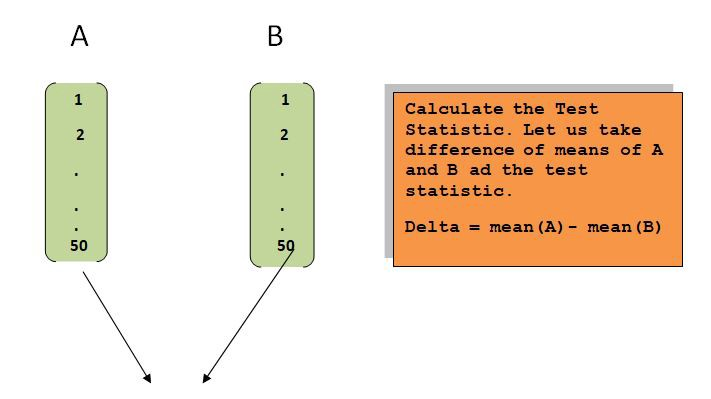

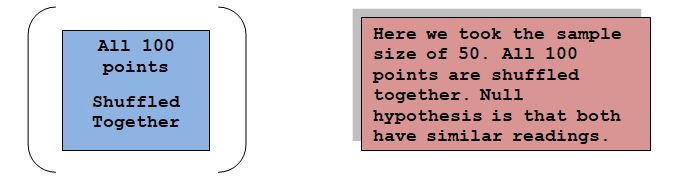

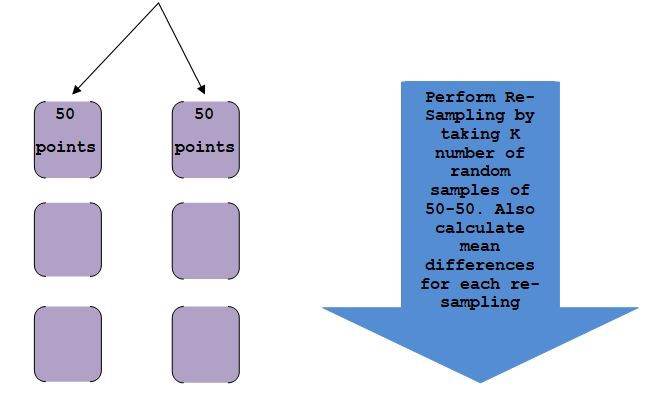

#### The next step is to sort the data list of difference of means we get from re-sampling K times, in ascending order. K can be 100, 1000 or any number we find appropriate.

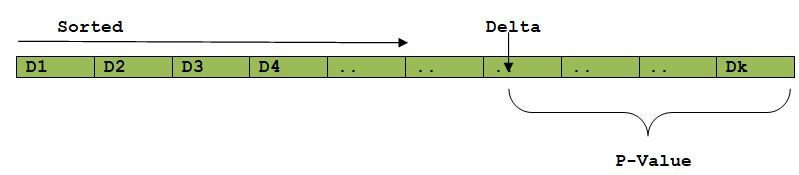

#### So, p-value is the percentile position of our test statistic(delta), less than 100%. If delta is in the 90th percentile position, then p-value would be 10% or 0.10.

#### Making the final decision, We say, p-value is the probability of observing delta given that our Null Hypothesis is True. So, if our hypothesis is actually true, the probability of observing the result we actually observed while performing our experiment(delta), will be high. By high its meant more than the significance level.

#### If the p-value is lower than the significance level, it means that probability of occurrence of our actual observation is low if Null Hypothesis is True. Thus, we can say:
- Accept Null Hypothesis when p-value ≥ Significance level.
- Reject Null Hypothesis and accept alternate Hypothesis if p-value < Significance level.

##### For this study, I have used python libraries: Numpy, Pandas, Matplotlib, Seaborn and scikit-learn. Let me show you how I performed exploratory data analysis and Hypothesis Testing on this data set.

#### Data set: THE SUICIDE RATES DATA SET
* Source of the Data Set : https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

#### Loading the .csv file into pandas dataframe

In [1]:
#Importing python libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
#Loading csv file into pandas dataframe
SuicideData= pd.read_csv('master.csv')
SuicideData.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


#### Primary Analysis of the data set

In [2]:
print(SuicideData.shape)
print(SuicideData.columns)

(27820, 12)
Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


#### There are 27820 Data points(Rows) and 12 Columns. Also showing column names for future reference

In [3]:
print(SuicideData.age.value_counts())

25-34 years    4642
75+ years      4642
55-74 years    4642
35-54 years    4642
15-24 years    4642
5-14 years     4610
Name: age, dtype: int64


In [4]:
SuicideData['suicides/100k pop'].mean()

12.816097411933894

#### We further drill down into the data, analyzing it on the basis of Gender and Age groups. Here is the code snippet and the result:

In [5]:
#DIVIDING BY GENDER
M=SuicideData[SuicideData.sex=='male']
F=SuicideData[SuicideData.sex=='female']
print('TOTAL MALE POPULATION = ',M.population.sum())
print('TOTAL MALE SUICIDES = ',M.suicides_no.sum())
print('AVERAGE MALE SUICIDES per 100k Population = ',M['suicides/100k pop'].mean())
print('TOTAL FEMALE POPULATION = ',F.population.sum())
print('TOTAL FEMALE SUICIDES = ',F.suicides_no.sum())
print('AVERAGE FEMALE SUICIDES per 100k Population = ',F['suicides/100k pop'].mean())
print('\nAVERAGE SUICIDE RATES BY AGE GROUP')
print(SuicideData.groupby(['age'])['suicides/100k pop'].mean())
print('\nAVERAGE SUICIDE RATES OF MALES BY AGE GROUP')
print(M.groupby(['age'])['suicides/100k pop'].mean())
print('\nAVERAGE SUICIDE RATES OF FEMALES BY AGE GROUP')
print(F.groupby(['age'])['suicides/100k pop'].mean())
print("\nSUICIDE RATE RATIO of FEMALE:MALE = 1 :",(M['suicides/100k pop'].mean()) / (F['suicides/100k pop'].mean()))

TOTAL MALE POPULATION =  25049376579
TOTAL MALE SUICIDES =  5188910
AVERAGE MALE SUICIDES per 100k Population =  20.239328540618263
TOTAL FEMALE POPULATION =  26272781857
TOTAL FEMALE SUICIDES =  1559510
AVERAGE FEMALE SUICIDES per 100k Population =  5.3928662832494885

AVERAGE SUICIDE RATES BY AGE GROUP
age
15-24 years     8.947154
25-34 years    12.186885
35-54 years    14.947441
5-14 years      0.620041
55-74 years    16.155579
75+ years      23.955409
Name: suicides/100k pop, dtype: float64

AVERAGE SUICIDE RATES OF MALES BY AGE GROUP
age
15-24 years    13.566290
25-34 years    19.800560
35-54 years    23.978402
5-14 years      0.777831
55-74 years    25.187712
75+ years      37.991017
Name: suicides/100k pop, dtype: float64

AVERAGE SUICIDE RATES OF FEMALES BY AGE GROUP
age
15-24 years    4.328018
25-34 years    4.573210
35-54 years    5.916480
5-14 years     0.462252
55-74 years    7.123447
75+ years      9.919802
Name: suicides/100k pop, dtype: float64

SUICIDE RATE RATIO of FEM

#### BOX PLOT — MALE vs FEMALE Suicide Rate

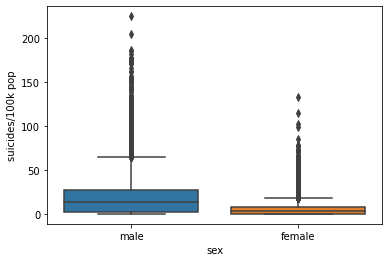

In [6]:
sb.boxplot(x='sex',y='suicides/100k pop', data=SuicideData)
mp.show()

#### VIOLIN PLOT — MALE vs FEMALE Suicide Rate

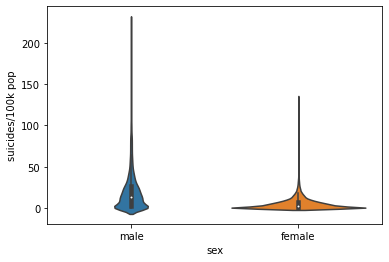

In [7]:
sb.violinplot(x='sex',y='suicides/100k pop', data=SuicideData)
mp.show()

#### Visualization of Suicide Rates according to age groups — Box Plot

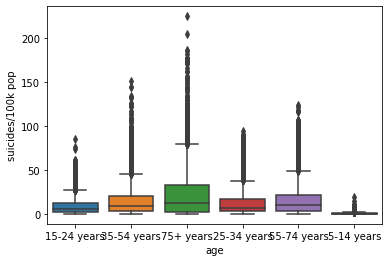

In [8]:
sb.boxplot(x='age',y='suicides/100k pop', data=SuicideData)
mp.show()

#### Observations from primary analysis

* Male suicide number and rate are both much higher than females. FEMALE : MALE = 1 : 3.75
* Even when we study them according to age groups, the results stay the same.
* One Striking fact is that persons in the age group of 75+are most suicidal regardless of gender.
* Age group 5–14 is least suicidal, which is quite normal.

## QUESTION: WHICH COUNTRY IS MOST SUICIDAL?

#### We will find the answer and quantify it using Hypothesis testing.
#### Calculate mean and median of suicide rates after grouping them by country and sort the results. This will give us the most suicidal country at the top.

In [9]:
suicide_mean_by_country=pd.DataFrame(SuicideData.groupby(['country'])['suicides/100k pop'].mean())
suicide_mean_by_country = suicide_mean_by_country.sort_values(by='suicides/100k pop', ascending=False)
suicide_mean_by_country

,suicides/100k pop
country,
Lithuania,40.415573
Sri Lanka,35.295152
Russian Federation,34.892377
Hungary,32.761516
Belarus,31.075913
...,...
Oman,0.736111
Antigua and Barbuda,0.552901
Jamaica,0.521765


In [10]:
suicide_median_by_country=pd.DataFrame(SuicideData.groupby(['country'])['suicides/100k pop'].quantile(0.5))
suicide_median_by_country = suicide_median_by_country.sort_values(by='suicides/100k pop', ascending=False)
suicide_median_by_country

,suicides/100k pop
country,
Sri Lanka,22.990
Lithuania,22.910
Russian Federation,19.125
Latvia,18.160
Hungary,17.785
...,...
Saint Kitts and Nevis,0.000
Qatar,0.000
Montenegro,0.000


#### We observe that almost 90% of top 10 suicidal countries are from Europe and Russia, with the exception of Sri Lanka and Japan. We can declare Lithuania as the most suicidal country but its better to quantify the results with some statistical significance before taking a decision.

#### APPLICATION OF HYPOTHESIS TESTING TO FIND OUT THE MOST SUICIDAL COUNTRY IN THE WORLD

* We perform hypothesis testing because when ranking by mean, Lithuania comes first with significantly higher value, but when ranked by median Sri Lanka comes on top of Lithuania by a very small margin.
* If the hypothesis test proves that there is no significant difference between suicide rates of Lithuania and Sri Lanka the we can surely consider Lithuania at the most suicidal country in the world(based on data from 1985–2016).
* NULL HYPOTHESIS — There is no significant difference between suicide rates of Lithuania and Sri Lanka.
* ALTERNATE HYPOTHESIS — There is significant difference between suicide rates of Lithuania and Sri Lanka.
* TEST STATISTIC — Difference of Medians of suicide rates of Lithuania and Sri Lanka.
* We take sample size of 100 from each country and set the significance level of 5% (0.05).
* NOW WE PERFORM OUR EXPERIMENT. First we divide the data by country.

In [11]:
lithuania=SuicideData[SuicideData.country=='Lithuania']
srilanka=SuicideData[SuicideData.country=='Sri Lanka']

* Then we take random samples of 100 data points each from Lithuania and Sri-Lanka.

In [12]:
sample_lithuania=lithuania.sample(100)
sample_srilanka=srilanka.sample(100)

* Now we take only the suicides rates column from the pandas dataframe of sample data and convert it into numpy array for ease of calculations.

In [13]:
S1=np.array(sample_lithuania['suicides/100k pop'])
print(S1)
median1=np.median(S1)
print('MEDIAN1=',median1)

[ 44.56  12.35  12.06  81.28  13.44  91.41 118.53  17.95  87.08  82.74
  76.32  15.27   0.38   4.22  74.09  40.15  52.94  41.46  72.86  10.2
   0.53   5.44  81.31  83.89   2.25  70.29  83.68  19.39  10.96   9.81
  40.82 134.29  81.43   8.01   2.51  61.17  50.8   14.55 121.81   1.25
  24.7   10.09  87.85   0.91  11.89  50.17  14.22   6.88  71.71  67.61
  78.9   11.53  56.96  75.5   79.12   8.75  83.02  62.3    2.22  84.53
   9.08   7.95  28.89  96.98  25.55  30.43 105.76  24.93  21.17  18.14
  45.99  81.18  49.66   1.38   0.39 144.59  14.85  11.87   8.98   5.59
  19.82  22.24 132.51  17.07  11.56   6.04  21.64  20.54  12.57  47.09
   1.79  33.98  27.33 115.34  95.89  22.46  34.14   5.59  21.3    7.26]
MEDIAN1= 24.814999999999998


In [14]:
S2=np.array(sample_srilanka['suicides/100k pop'])
print(S2)
median2=np.median(S2)
print('MEDIAN2=',median2)

[ 67.29   2.08  72.97   2.    64.55   3.11  43.33 123.72  13.02   0.68
  92.57   1.63  14.9   65.15  29.77   0.66  10.67   2.57  28.04  18.44
  91.81  42.37  43.67  76.18   3.04  65.46  18.73   2.25  60.22  37.17
   1.94   9.01  13.24   1.42  22.15  12.16  13.92  11.68  66.75  70.49
   7.61  61.46  28.36  43.23  15.5   70.52  14.2   79.75  47.85  70.51
   1.72 101.59   2.82   1.43  21.7   51.92  28.89  11.99  93.81  14.48
  22.51  14.06   3.87  28.96  13.33  54.63  15.57  10.01  24.92  12.24
  30.33  18.9   76.6   19.26  59.62  33.88  87.74  18.96  65.23  11.66
   1.22  73.21  19.6   15.29   8.67  33.6   41.28  12.91  79.1   61.77
 125.22   8.23  50.54  20.11 108.22  51.36  28.29  12.17   1.99  10.56]
MEDIAN2= 21.924999999999997


* We can see that even the median suicide rates of samples from the two countries are very close. So we now calculate the value of our test statistic as follows

In [15]:
TS= median1-median2
print("Test Statistic is (Median of Lithuania - Median of Sri Lanka)=", TS)

Test Statistic is (Median of Lithuania - Median of Sri Lanka)= 2.8900000000000006


* As explained earlier, the next step is to concatenate the two sets of sample data into one set and shuffling them, so that observations of both sets are mixed properly into one single set.

In [16]:
S= np.concatenate((S1,S2), axis=None)
np.random.shuffle(S)
print(S)

[ 11.87  96.98   8.23  79.75  14.9   10.09 132.51  76.6   92.57   7.26
  65.15  33.88  28.04 115.34  79.1   10.56   5.59   2.22 125.22  37.17
  15.29  24.7    9.81  72.97  30.33  14.48   1.94  22.15  12.35   1.43
  10.01  65.23  50.54  11.53   5.44  18.73  76.32  81.43   2.57  49.66
  28.89 134.29  11.99  83.02  87.08  11.89   7.95   2.82  10.96  41.46
  61.77  74.09  70.29   2.25  87.85   5.59  70.49   1.79  13.33  52.94
   1.38  24.93   1.25  28.96   8.01   8.75 105.76  12.16  10.67  18.44
  14.85  20.11   1.99  12.91  56.96  73.21  61.46  19.39  43.67 118.53
  40.15  65.46  34.14   0.39  82.74   2.25  59.62  75.5   76.18  11.68
  78.9   43.23  64.55  83.89   0.66  67.29  70.52  15.27  62.3   14.55
  60.22  30.43  14.06   3.87  91.81  51.36  45.99  22.24  91.41  27.33
  13.44  18.14  54.63 123.72   0.68   0.53  19.82  17.07  83.68  18.9
  12.24  70.51  71.71  28.36  66.75  41.28  19.6    0.91  25.55   6.04
  15.57   2.51  29.77  28.89  21.64  24.92  12.17  12.57   1.72   4.22
  67.61

* We perform re-sampling 1000 times by taking two samples sets of 100 points and calculate the difference of their medians each time. The list of median differences are stored in another numpy array.

In [17]:
#Randomly sample 100-100 data points and calculate the difference of medians
medianlist=np.zeros(1000)
for i in range(1000):
    _s1= np.random.choice(S,100)
    _s2= np.setdiff1d(S, _s1)
    _median1= np.median(_s1)
    _median2= np.median(_s2)
    medianlist[i]= np.array(_median1 - _median2)

* For the final step, the medianlist is sorted in ascending order, p-value is calculated and we draw our final conclusion. The code snippet and results are as follows:

In [18]:
medianlist=np.sort(medianlist)
#calculation of p-value
ct=0
for i in medianlist:
    if i < TS:
        ct+=1
pvalue= (1000-ct) / 1000
medianlist=pd.DataFrame(medianlist, columns=['mediandiff'])
pv95=medianlist.mediandiff[949]
print('VALUE in 95th Percentile position=', pv95)
print('TEST STATISTIC =',TS)
print('P-VALUE OF TS =', pvalue)
if pvalue>0.05:
    print('OBSERVATION VALUE IS LOWER THAN THE 95th Percentile.\nTHUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS High, AS P-VALUE OF {} IS HIGHER THAN THE SIGNIFICANCE LEVEL OF 0.05'.format(pvalue))
    print('SO WE ACCEPT THE NULL HYPOTHESIS AS TRUE : LITHUANIA AND SRI LANKA HAVE NO SIGNIFICANT DIFFERENCE IN SUICIDE RATES')
else:
    print('OBSERVATION VALUE IS HIGHER THAN THE 95th Percentile.\nTHUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS Extremely Low, AS P-VALUE OF {} IS LOWER THAN THE SIGNIFICANCE LEVEL OF 0.05'.format(pvalue))
    print('SO WE REJECT THE NULL HYPOTHESIS AND ACCEPT THE ALTERNATE HYPOTHESIS : LITHUANIA AND SRI LANKA HAVE A SIGNIFICANT DIFFERENCE IN SUICIDE RATES')
    if TS > 0:
        print('FROM THE SIGN OF TS WE KNOW LITHUANIA HAS A HIGHER SUICIDE RATE')
    else:
        print('FROM THE SIGN OF TS WE KNOW SRI LANKA HAS A HIGHER SUICIDE RATE')

VALUE in 95th Percentile position= 12.580000000000002
TEST STATISTIC = 2.8900000000000006
P-VALUE OF TS = 0.355
OBSERVATION VALUE IS LOWER THAN THE 95th Percentile.
THUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS High, AS P-VALUE OF 0.355 IS HIGHER THAN THE SIGNIFICANCE LEVEL OF 0.05
SO WE ACCEPT THE NULL HYPOTHESIS AS TRUE : LITHUANIA AND SRI LANKA HAVE NO SIGNIFICANT DIFFERENCE IN SUICIDE RATES


* A p-Value of 0.511 means that there is a probability of almost 50% that our sample observations will occur given that there is no significant difference between suicide rates to Lithuania and Sri Lanka, which is much higher than 5% significance level. Thus we accept our null hypothesis as True.
* So we can say Lithuania is the most suicidal country in the world because the mean difference of suicide rates of Lithuania and 2nd Highest- Sri Lanka is high but median difference is not significant. Thus we pass our judgement based on the mean difference.
* Now you may doubt the result of hypothesis testing, so I am going to show what happens if we perform the same test on Lithuania vs Japan.

#### HYPOTHESIS TESTING : WHICH COUNTRY IS MORE SUICIDAL, LITHUANIA or JAPAN?

* We know Japan has a much lower suicide rate than Lithuania and it comes on 8th spot when ranking by median. So, if our hypothesis test gives the same result then we can trust this method of testing.

* NULL HYPOTHESIS — There is no significant difference between suicide rates of Lithuania and Japan.

* ALTERNATE HYPOTHESIS — There is significant difference between suicide rates of Lithuania and Japan.

* TEST STATISTIC — Difference of Medians of suicide rates of Lithuania and Japan.

* We take sample size of 100 from each country and set the significance level of 5% (0.05).

* Performing sampling for Japan:

In [20]:
japan=SuicideData[SuicideData.country=='Japan']
japan

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
13364,Japan,1985,male,75+ years,1340,1791000,74.82,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
13365,Japan,1985,female,75+ years,1553,2862400,54.26,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
13366,Japan,1985,male,55-74 years,3763,8996900,41.83,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
13367,Japan,1985,male,35-54 years,6962,17833300,39.04,Japan1985,0.791,"1,398,892,744,821",12401,Silent
13368,Japan,1985,male,25-34 years,1982,8465800,23.41,Japan1985,0.791,"1,398,892,744,821",12401,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
13731,Japan,2015,female,35-54 years,2024,16991218,11.91,Japan2015,NaN,"4,394,977,752,878",36510,Generation X
13732,Japan,2015,female,25-34 years,685,6614211,10.36,Japan2015,NaN,"4,394,977,752,878",36510,Millenials
13733,Japan,2015,female,15-24 years,408,5772938,7.07,Japan2015,NaN,"4,394,977,752,878",36510,Millenials
13734,Japan,2015,male,5-14 years,62,5553851,1.12,Japan2015,NaN,"4,394,977,752,878",36510,Generation Z


In [21]:
sample_japan=japan.sample(100)
S3=np.array(sample_japan['suicides/100k pop'])
print(S3)
median3=np.median(S3)

[ 7.96 33.54 20.36 48.74 18.43 52.59  0.37 10.36 13.44 41.04 21.37 10.36
 47.75 10.92 41.14  0.79 27.07 17.92  6.34 14.11 55.09  8.32 16.84 30.08
 10.05 17.87 30.54 35.71 43.11 30.39 16.92 15.41  9.31  0.28 11.35 45.19
 41.96  4.75  0.57 58.59  0.96 28.08 42.91 11.01  7.84 33.21 14.74  9.69
  0.72 19.15 21.54 16.65 35.33 31.68 15.07  1.12 33.97 15.48  0.43 36.46
 11.04 11.03  7.29 22.86 36.93 56.48 11.62 33.78  5.87 17.93  8.43 20.2
 42.83 13.3  19.83  0.36  4.73 25.21 14.13 47.55  9.82 19.31 20.53 18.44
  0.62 48.28 38.27  0.68 12.5  15.2   8.39  9.12 36.47 30.31 31.85 17.52
  0.53 41.8  11.91 23.41]


* Calculate the Test Statistic value

In [22]:
TS2=median1-median3
print("Test Statistic is (Median of Lithuania - Median of Japan)=", TS2)

Test Statistic is (Median of Lithuania - Median of Japan)= 7.119999999999997


* Concatenate and shuffle:

In [23]:
SS= np.concatenate((S1,S3), axis=None)
np.random.shuffle(SS)
print(SS)

[134.29  95.89   0.62  33.98  21.3   78.9   28.08   9.08   8.32  52.94
  56.96  15.2   41.04   7.26  30.39  43.11  20.36  13.44  82.74  18.43
   7.95  10.05  15.27  47.09  10.96   8.43  45.99   5.59  75.5    0.68
  11.62   9.82   2.22 115.34  21.37   7.96   7.29  25.21  23.41   0.28
  81.18   5.59  19.83  11.01  22.86  17.52  74.09  11.89 105.76  50.17
 132.51  21.64  87.85  33.97  31.85  40.82  83.68  24.93  22.24  11.35
   7.84  12.06  11.03   2.51  48.74  12.57   1.79  30.43  11.56  17.95
  14.13  81.31   8.98  84.53  17.07 118.53   6.34  42.83   5.44  18.44
  34.14  19.82  10.92  41.14   2.25  79.12   1.12  16.92  27.07   1.25
  14.11   5.87  25.55  15.41  19.15  35.71  10.09  20.2   10.36  21.54
  83.89  36.93   0.72  81.43  33.21  24.7    0.53   0.57  16.84  11.04
  17.87  76.32  50.8   21.17   0.38  91.41  12.35  49.66   9.31   8.01
  41.8   17.92  33.54  10.36  41.46  15.07  70.29  81.28   1.38   0.39
  36.46  27.33  56.48  33.78  35.33  48.28  11.53  87.08  12.5   96.98
  31.6

* Randomly sample 100–100 data points and calculate the difference of medians

In [24]:
medianlist2=np.zeros(1000)
for i in range(1000):
    _s1= np.random.choice(SS,100)
    _s3= np.setdiff1d(SS, _s1)
    #print(_s1)
    #print(_s3)
    _median1= np.median(_s1)
    _median3= np.median(_s3)
    medianlist2[i]= np.array(_median1 - _median3)

* Final Calculations and result after sorting median list

In [25]:
medianlist2=np.sort(medianlist2)
#calculation of p-value
ct2=0
for i in medianlist2:
    if i < TS2:
        ct2+=1
pvalue2= (1000-ct2) / 1000
medianlist2=pd.DataFrame(medianlist2, columns=['mediandiff'])
pv95_2=medianlist2.mediandiff[949]
print('VALUE in 95th Percentile position=', pv95_2)
print('TEST STATISTIC =',TS2)
print('P-VALUE OF TS =', pvalue2)
if pvalue2>0.05:
    print('OBSERVATION VALUE IS LOWER THAN THE 95th Percentile.\nTHUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS High, AS P-VALUE OF {} IS HIGHER THAN THE SIGNIFICANCE LEVEL OF 0.05'.format(pvalue2))
    print('SO WE ACCEPT THE NULL HYPOTHESIS AS TRUE : LITHUANIA AND JAPAN HAVE NO SIGNIFICANT DIFFERENCE IN SUICIDE RATES')
else:
    print('OBSERVATION VALUE IS HIGHER THAN THE 95th Percentile.\nTHUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS Extremely Low, AS P-VALUE OF {} IS LOWER THAN THE SIGNIFICANCE LEVEL OF 0.05'.format(pvalue2))
    print('SO WE REJECT THE NULL HYPOTHESIS AND ACCEPT THE ALTERNATE HYPOTHESIS : LITHUANIA AND JAPAN HAVE A SIGNIFICANT DIFFERENCE IN SUICIDE RATES')
    if TS2 > 0:
        print('FROM THE SIGN OF TS WE KNOW LITHUANIA HAS A HIGHER SUICIDE RATE')
    else:
        print('FROM THE SIGN OF TS WE KNOW JAPAN HAS A HIGHER SUICIDE RATE')

VALUE in 95th Percentile position= 6.225000000000001
TEST STATISTIC = 7.119999999999997
P-VALUE OF TS = 0.042
OBSERVATION VALUE IS HIGHER THAN THE 95th Percentile.
THUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS Extremely Low, AS P-VALUE OF 0.042 IS LOWER THAN THE SIGNIFICANCE LEVEL OF 0.05
SO WE REJECT THE NULL HYPOTHESIS AND ACCEPT THE ALTERNATE HYPOTHESIS : LITHUANIA AND JAPAN HAVE A SIGNIFICANT DIFFERENCE IN SUICIDE RATES
FROM THE SIGN OF TS WE KNOW LITHUANIA HAS A HIGHER SUICIDE RATE


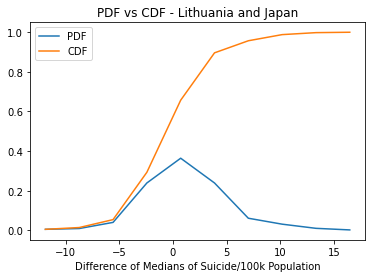

In [26]:
count, bins = np.histogram(medianlist2.mediandiff, bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
mp.plot(bins[1:],pdf, label='PDF')
mp.plot(bins[1:],cdf, label='CDF')
mp.title('PDF vs CDF - Lithuania and Japan')
mp.xlabel('Difference of Medians of Suicide/100k Population')
mp.legend()
mp.show()

##### Our Hypothesis test proves that Lithuania has a higher suicide rate than Japan as the p-value is extremely low, about 1%.

#### To Summarize

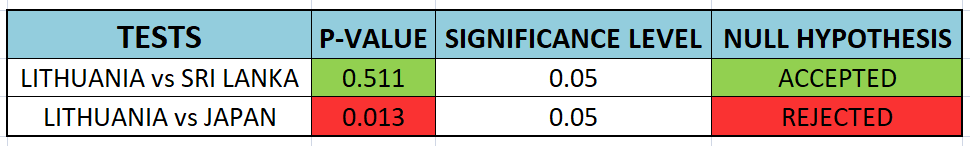

#### Thus it can be concluded that HYPOTHESIS TESTING is a good way to test the possibility of an assumption with statistical proof of it.

## QUESTION: ARE SUICIDE RATES DEPENDENT ON GDP PER CAPITA?

* One can wonder if there are more suicides when the economic conditions of a place worsens and less suicides happen when economic conditions or income is better.
* We can find out if this really happens from our suicide data set and quantify it with another test parameter, known as Spearman’s rank correlation coefficient.

In [29]:
SuicideData['gdp_per_capita ($)'].describe()

count     27820.000000
mean      16866.464414
std       18887.576472
min         251.000000
25%        3447.000000
50%        9372.000000
75%       24874.000000
max      126352.000000
Name: gdp_per_capita ($), dtype: float64

#### APPLYING Spearman’s rank correlation coefficient to Answer our Question

* In our case we can test if change in GDP per capita brings change in suicide rates.

* Let us plot a graph and visualize the data, where the increase in GDP per capita is on the X-Axis and Suicides/100k population is on the Y-AXIS. It is also color coded according to age groups

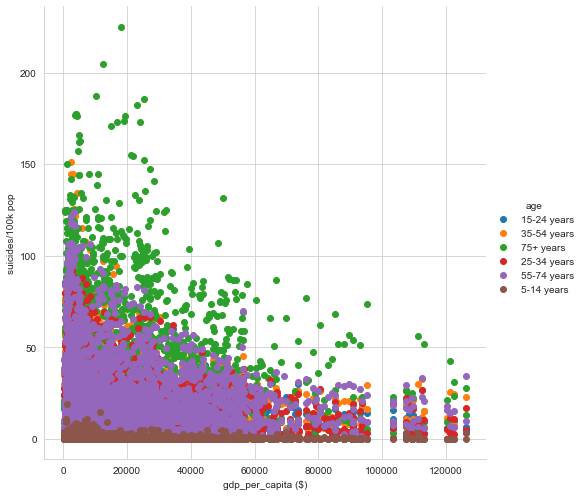

In [30]:
sb.set_style("whitegrid");
sb.FacetGrid(SuicideData, hue="age", height=7) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.show();

##### We can see there are fewer points where GDP per capita is on the higher side, but the data points are scattered and does not seem to be well related. So, it is best to divide the data into age groups, plot them and find each of their Spearman’s rank correlation coefficient values. I have used scipy.stats python library to calculate our results.

In [34]:
#DIVIDING BY AGE GROUP
A5_14=SuicideData[SuicideData.age=='5-14 years']
A15_24=SuicideData[SuicideData.age=='15-24 years']
A25_34=SuicideData[SuicideData.age=='25-34 years']
A35_54=SuicideData[SuicideData.age=='35-54 years']
A55_74=SuicideData[SuicideData.age=='55-74 years']
A75P=SuicideData[SuicideData.age=='75+ years']

#MALES
AM5_14=M[M.age=='5-14 years']
AM15_24=M[M.age=='15-24 years']
AM25_34=M[M.age=='25-34 years']
AM35_54=M[M.age=='35-54 years']
AM55_74=M[M.age=='55-74 years']
AM75P=M[M.age=='75+ years']

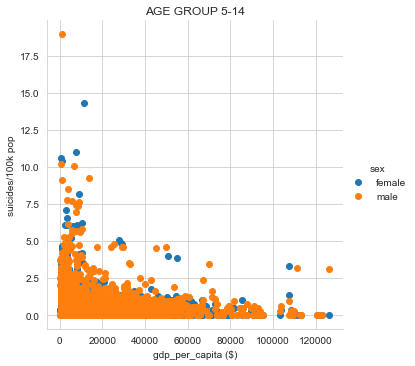

In [32]:
sb.set_style("whitegrid");
sb.FacetGrid(A5_14, hue='sex', height=5) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.title('AGE GROUP 5-14')
mp.show();

In [35]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 5-14 years 

sp.spearmanr(A5_14['gdp_per_capita ($)'],A5_14['suicides/100k pop'] )

SpearmanrResult(correlation=-0.16081774476923122, pvalue=4.381154187347501e-28)

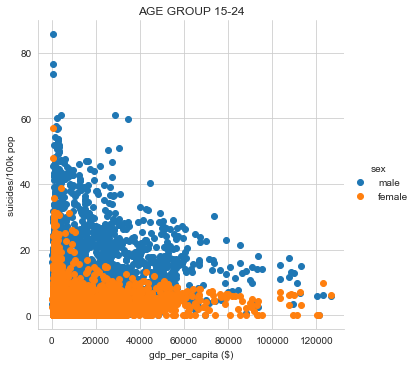

In [36]:
sb.set_style("whitegrid");
sb.FacetGrid(A15_24, hue='sex', height=5) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.title('AGE GROUP 15-24')
mp.show();

In [37]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 15-24 years 

sp.spearmanr(A15_24['gdp_per_capita ($)'],A15_24['suicides/100k pop'] )

SpearmanrResult(correlation=-0.007046659223596717, pvalue=0.6312407417699475)

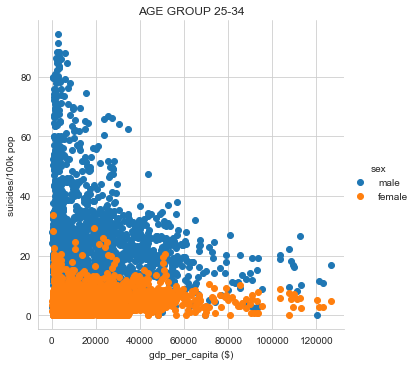

In [38]:
sb.set_style("whitegrid");
sb.FacetGrid(A25_34, hue='sex', height=5) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.title('AGE GROUP 25-34')
mp.show();

In [39]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 25-34 years 

sp.spearmanr(A25_34['gdp_per_capita ($)'],A25_34['suicides/100k pop'] )

SpearmanrResult(correlation=0.0936469315164842, pvalue=1.6297404505901945e-10)

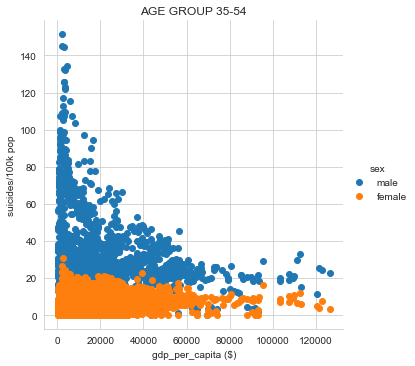

In [40]:
sb.set_style("whitegrid");
sb.FacetGrid(A35_54, hue='sex', height=5) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.title('AGE GROUP 35-54')
mp.show();

In [41]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 35-54 years 

sp.spearmanr(A35_54['gdp_per_capita ($)'],A35_54['suicides/100k pop'] )

SpearmanrResult(correlation=0.1690685598668204, pvalue=4.144502810705675e-31)

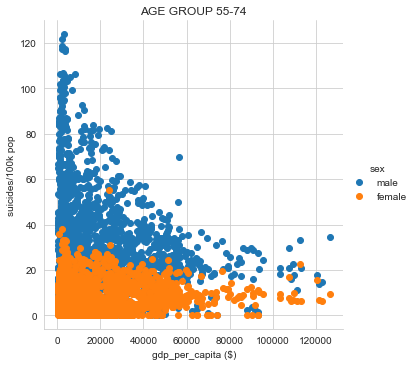

In [42]:
sb.set_style("whitegrid");
sb.FacetGrid(A55_74, hue='sex', height=5) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.title('AGE GROUP 55-74')
mp.show();

In [43]:
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 55-74 years 

sp.spearmanr(A55_74['gdp_per_capita ($)'],A55_74['suicides/100k pop'] )

SpearmanrResult(correlation=0.14078055044073637, pvalue=5.571939552827092e-22)

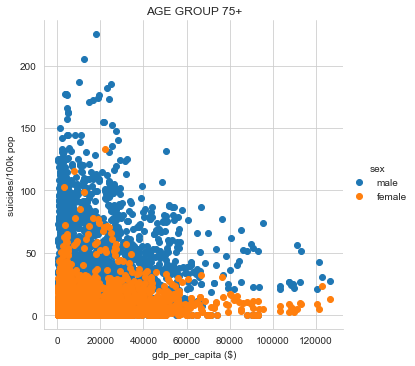

In [44]:
sb.set_style("whitegrid");
sb.FacetGrid(A75P, hue='sex', height=5) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.title('AGE GROUP 75+')
mp.show();

In [45]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 75+ years 

sp.spearmanr(A75P['gdp_per_capita ($)'],A75P['suicides/100k pop'] )

SpearmanrResult(correlation=0.10607524884952993, pvalue=4.3038326856836297e-13)

* Even for Individual age groups, the properties remain similar. Now we calculate the coefficient values.

In [46]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR ALL THE AGE GROUPS
sp.spearmanr(A5_14['gdp_per_capita ($)'],A5_14['suicides/100k pop'] )
sp.spearmanr(A15_24['gdp_per_capita ($)'],A15_24['suicides/100k pop'] )
sp.spearmanr(A25_34['gdp_per_capita ($)'],A25_34['suicides/100k pop'] )
sp.spearmanr(A35_54['gdp_per_capita ($)'],A35_54['suicides/100k pop'] )
sp.spearmanr(A55_74['gdp_per_capita ($)'],A55_74['suicides/100k pop'] )
sp.spearmanr(A75P['gdp_per_capita ($)'],A75P['suicides/100k pop'] )


SpearmanrResult(correlation=0.10607524884952993, pvalue=4.3038326856836297e-13)

### We observe the correlation values to be extremely close to zero. This indicates that there is no correlation between GDP per capita and Suicide rate.

## CONCLUSION

#### You have seen how important Statistical methods are for confirmation of any assumption we make based on some data we observe. Sometimes something we observe might not actually be true and that is where these methods help us in proving our theory with Statistical Significance.